# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = data_path = r'C:\Users\Ehab\Downloads\CC GENERAL.csv'
  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [3]:
df.drop('CUST_ID', axis=1, inplace=True)
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [4]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

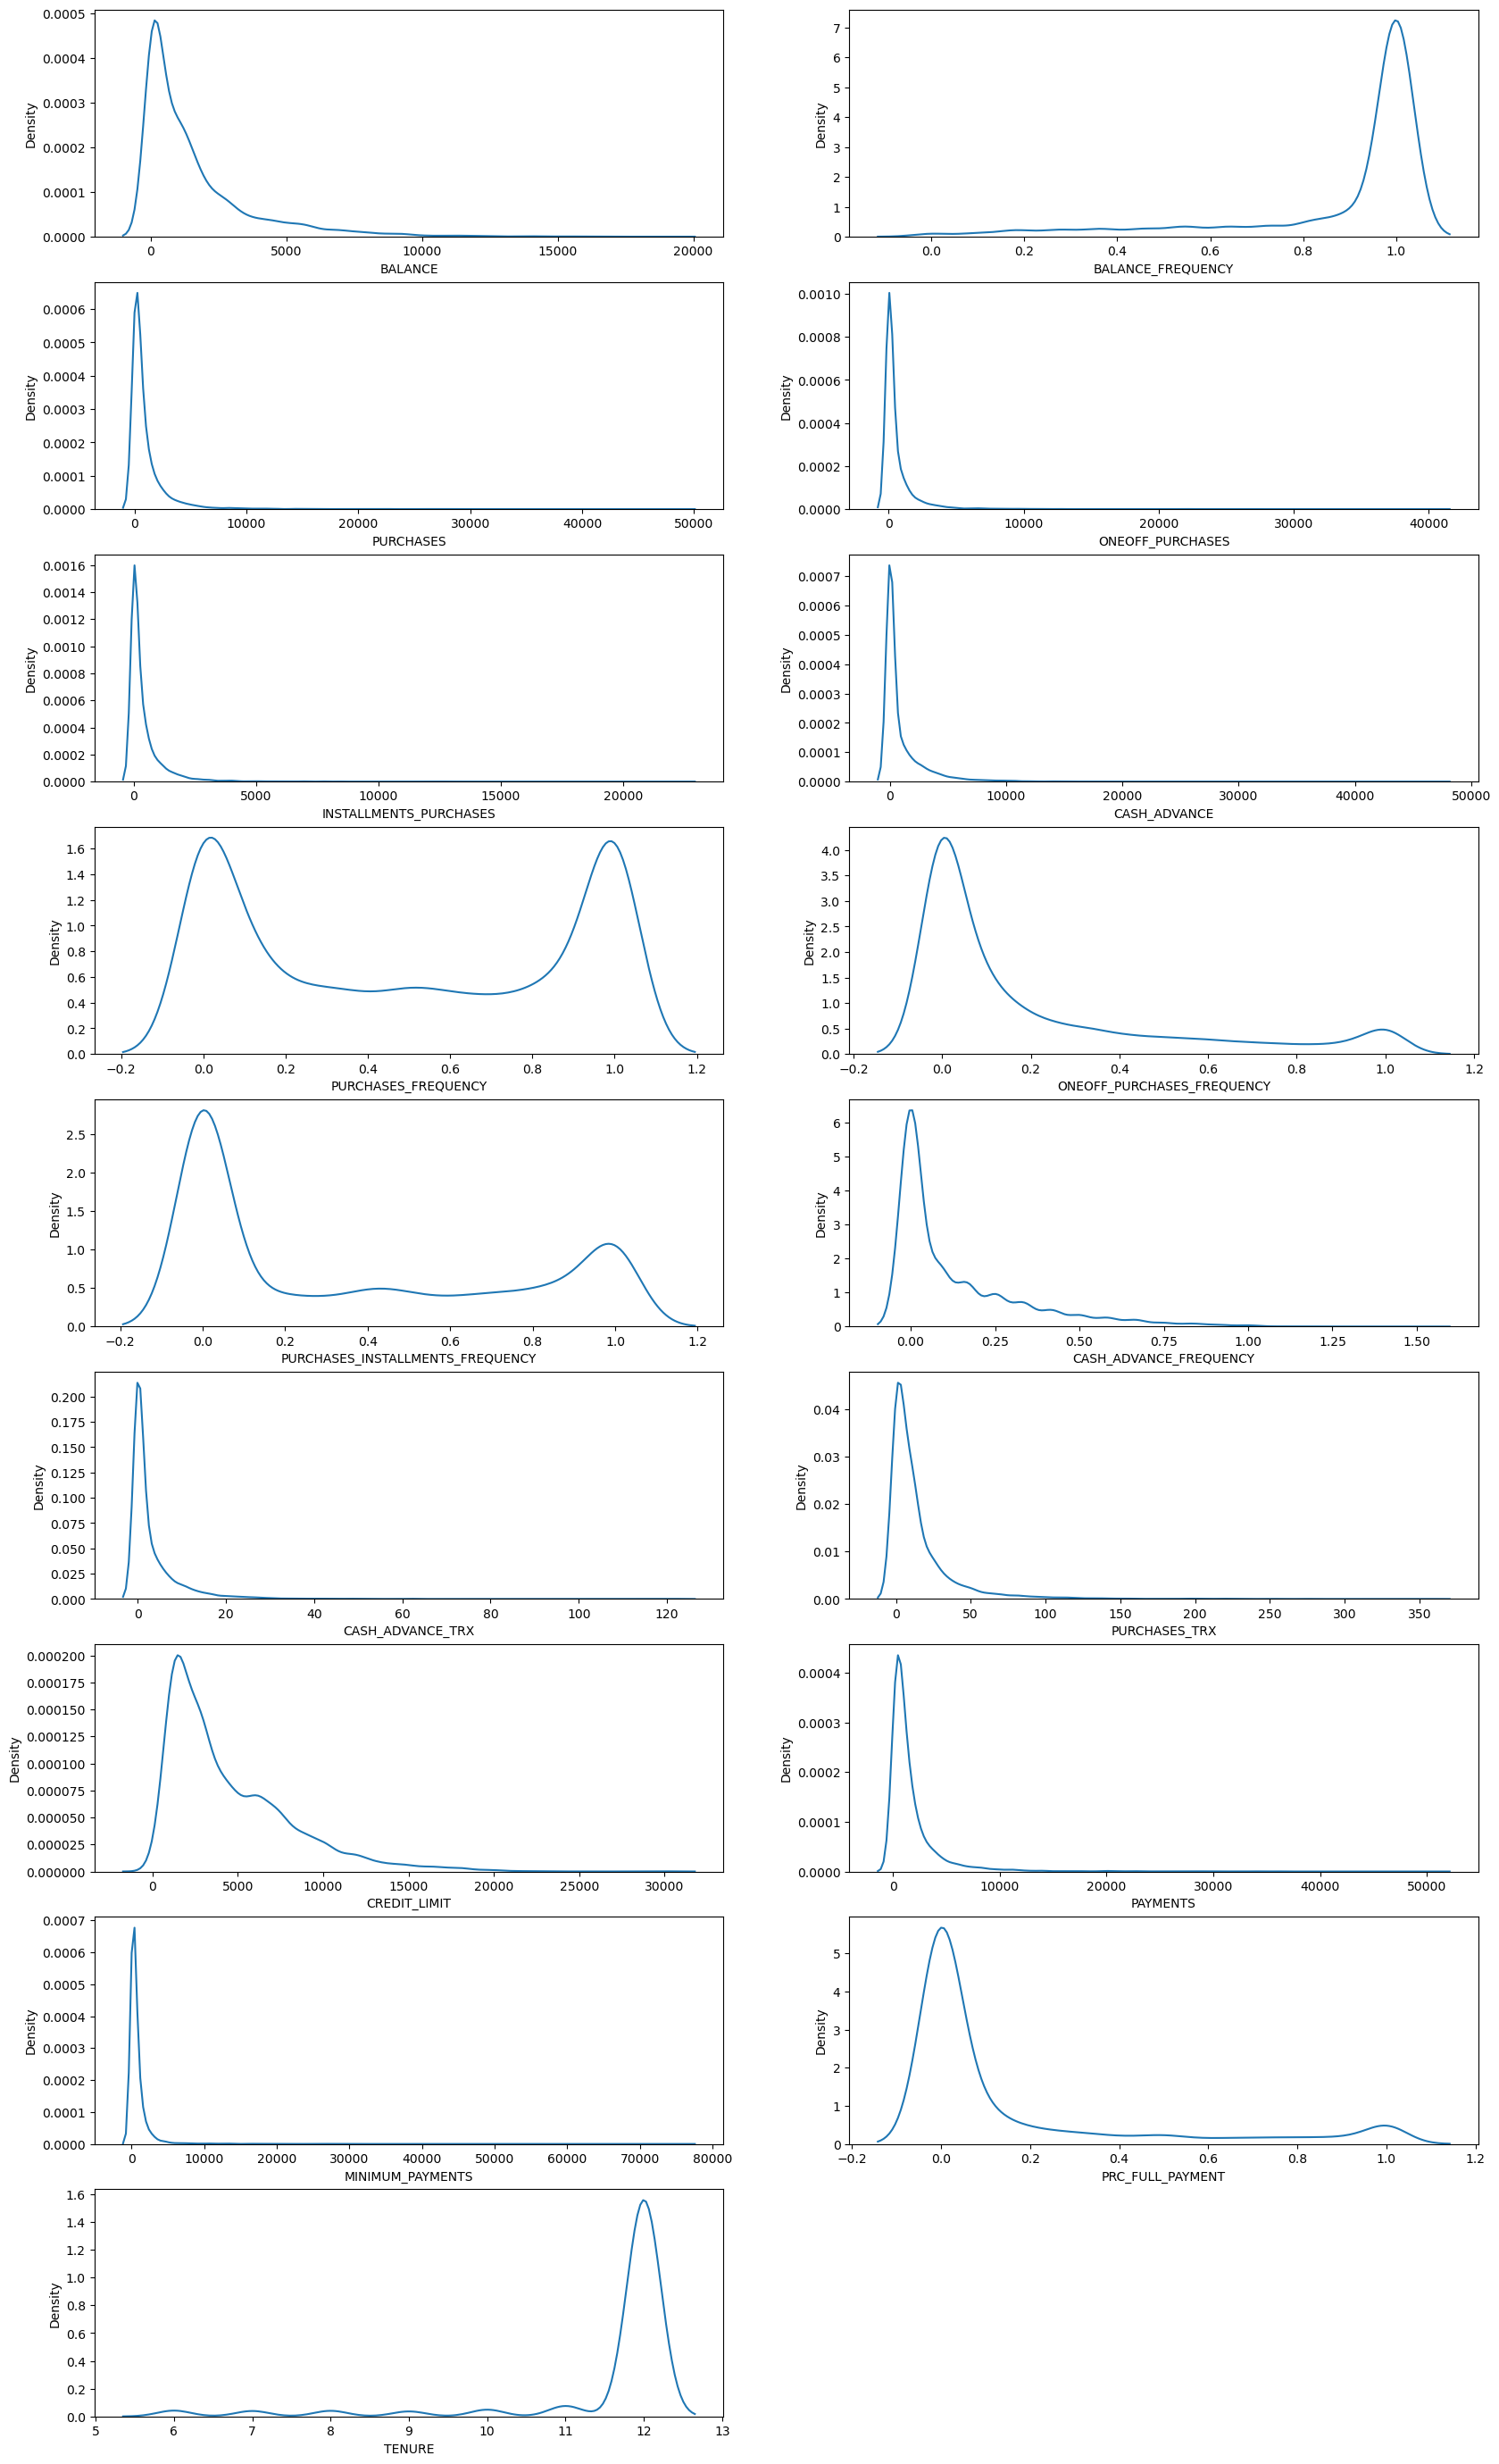

In [5]:
import seaborn as sns
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

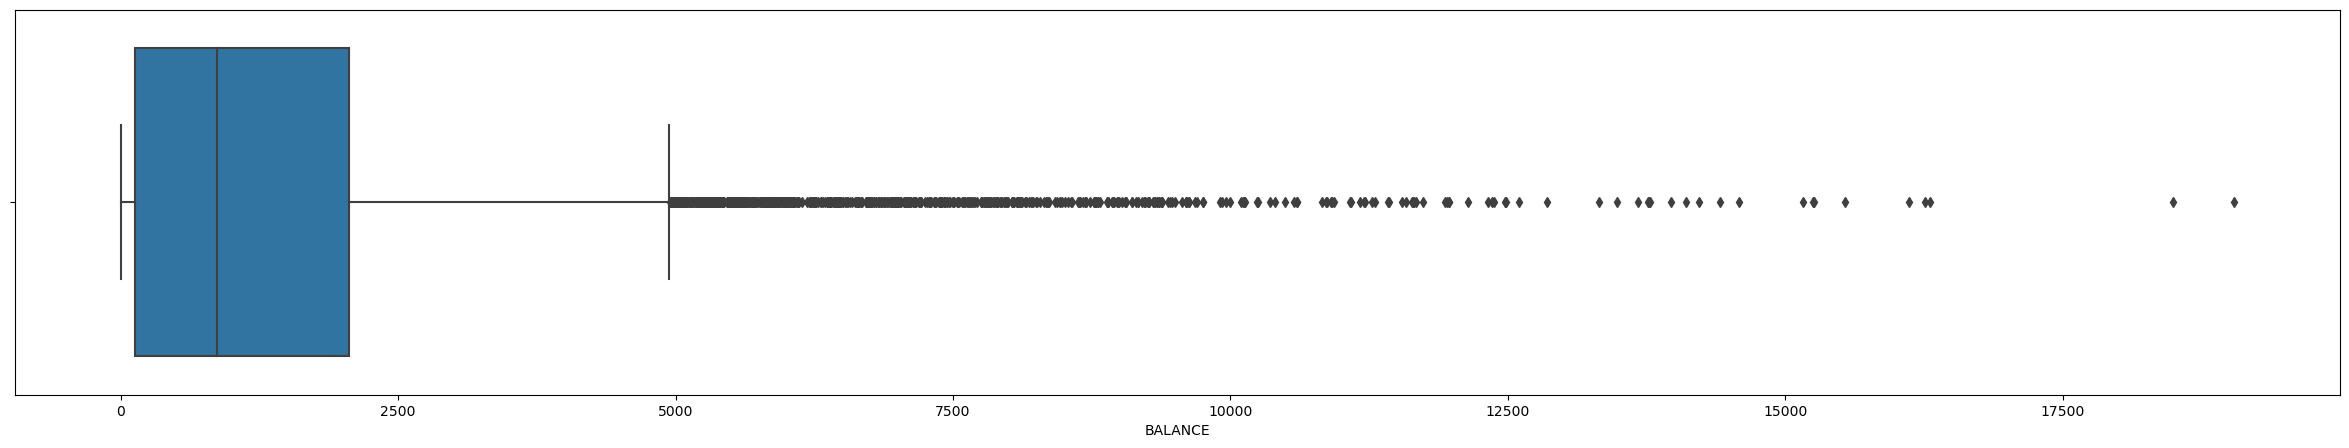

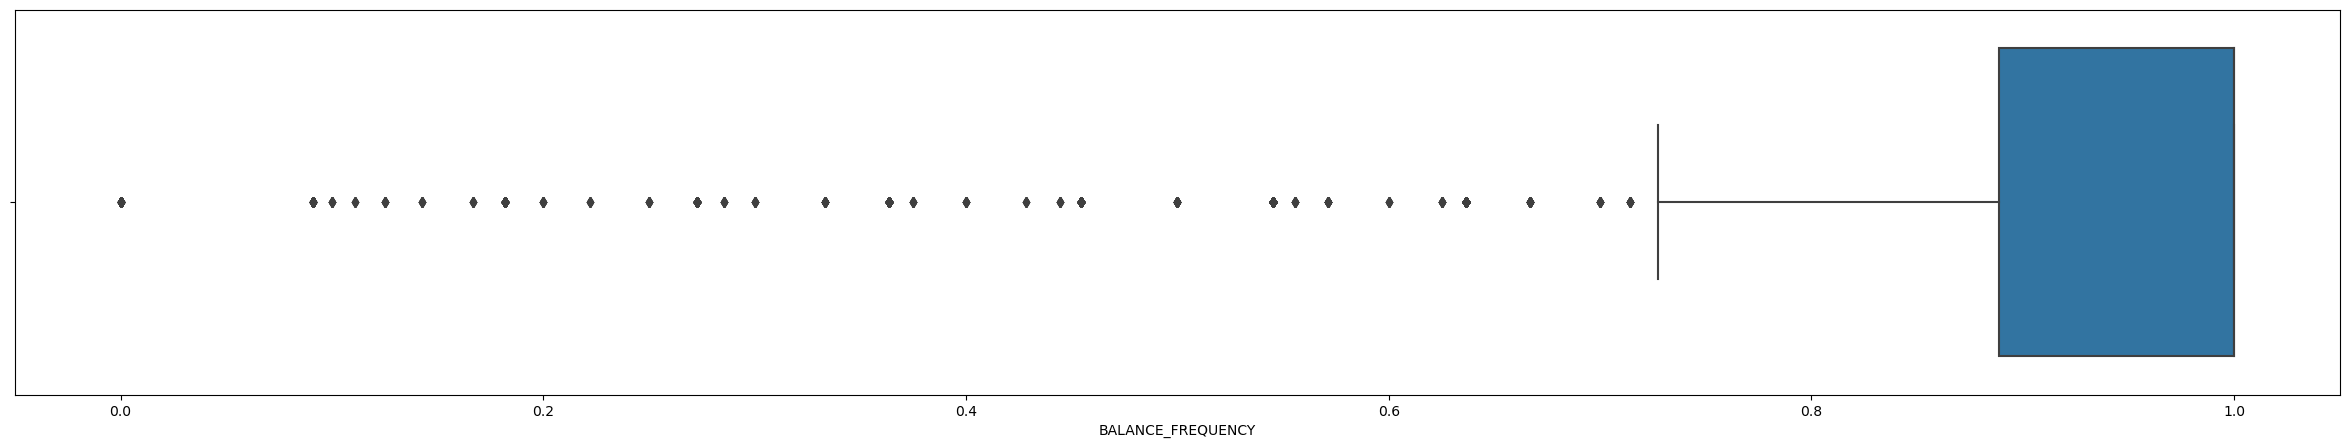

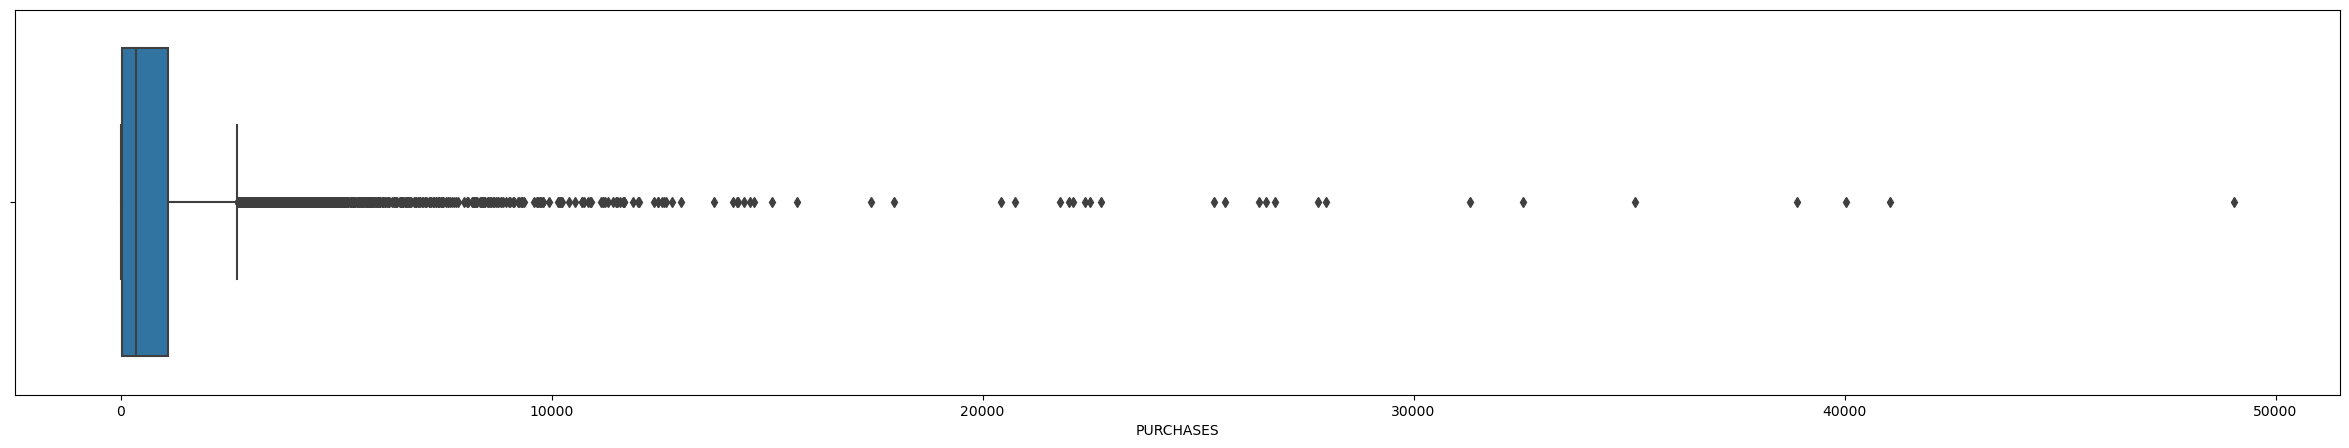

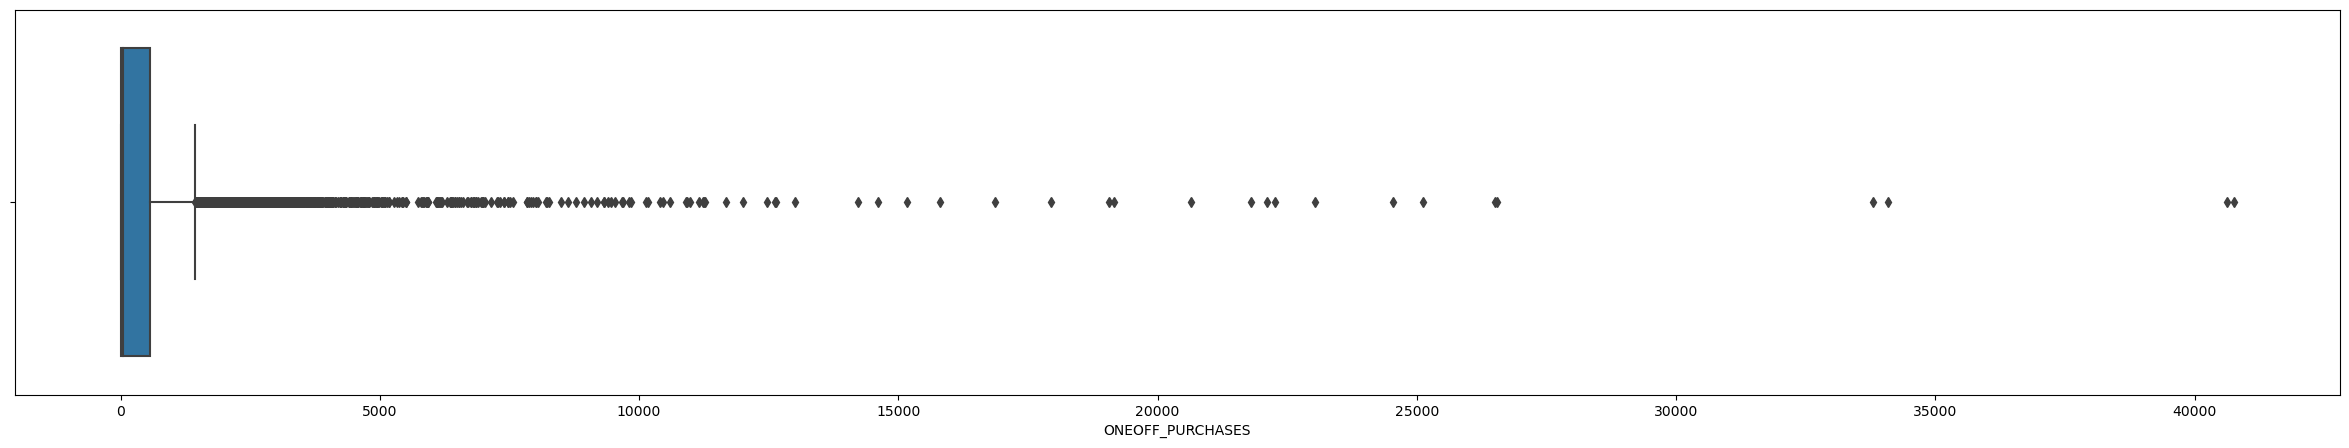

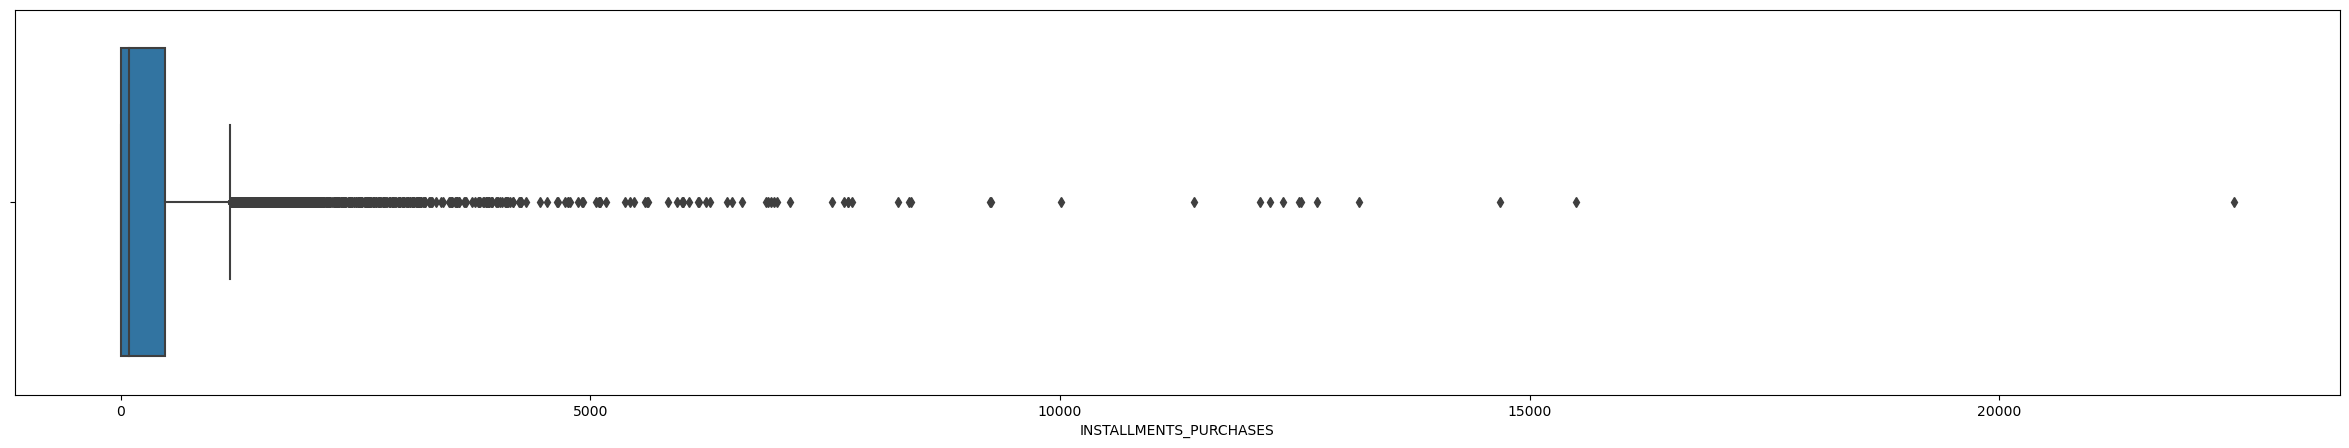

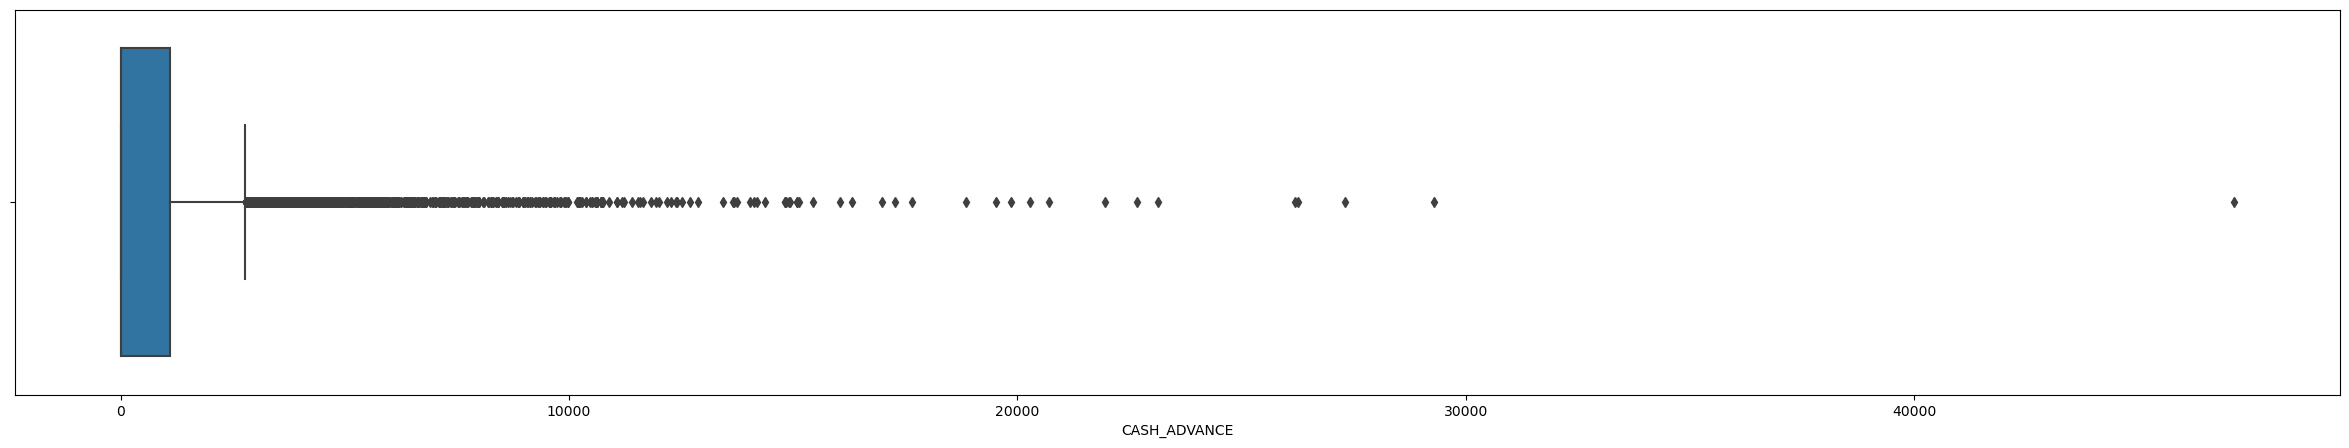

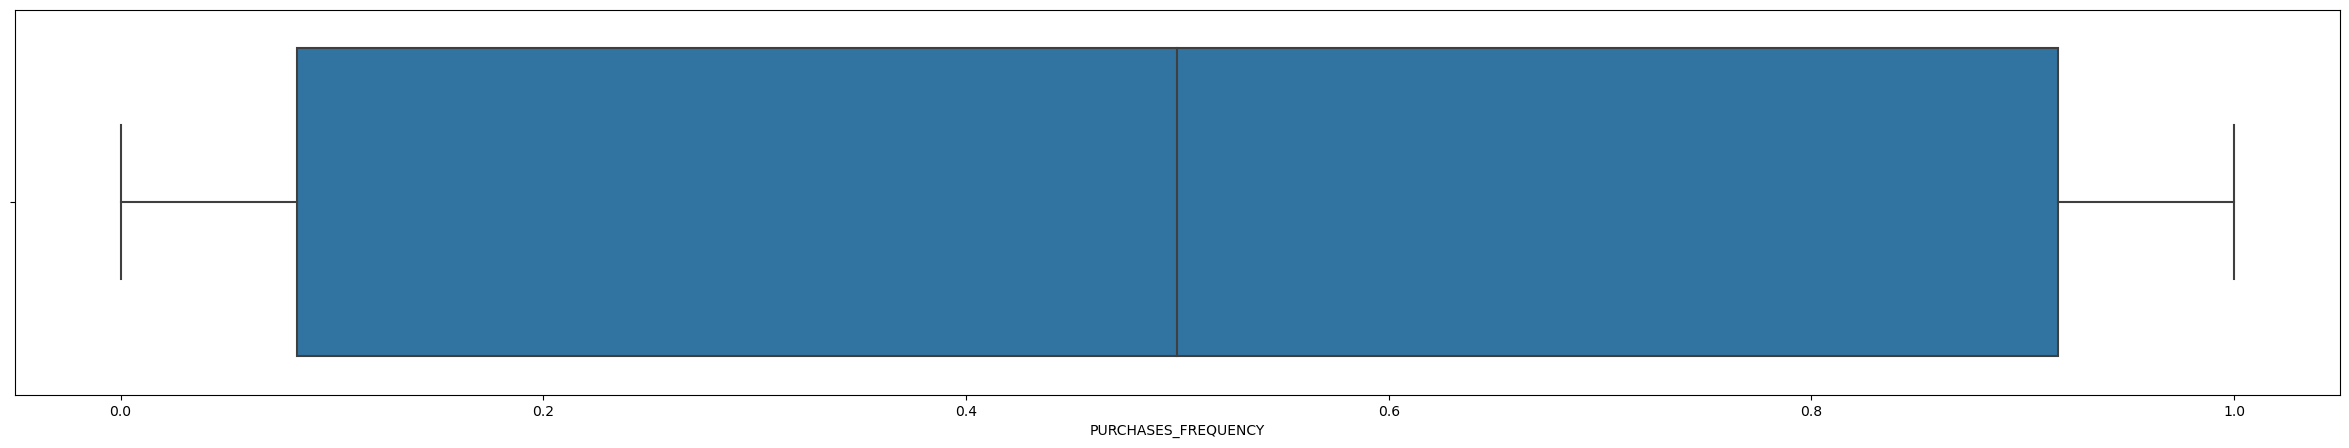

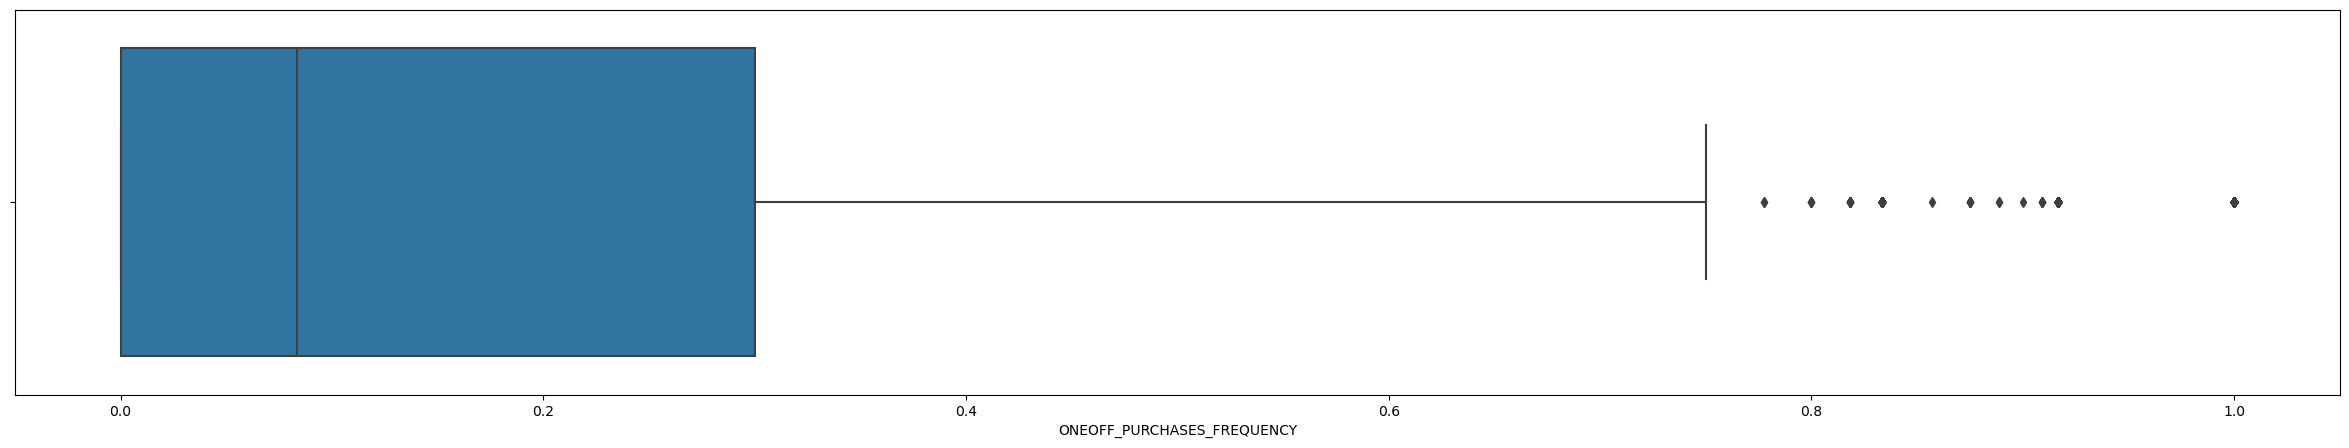

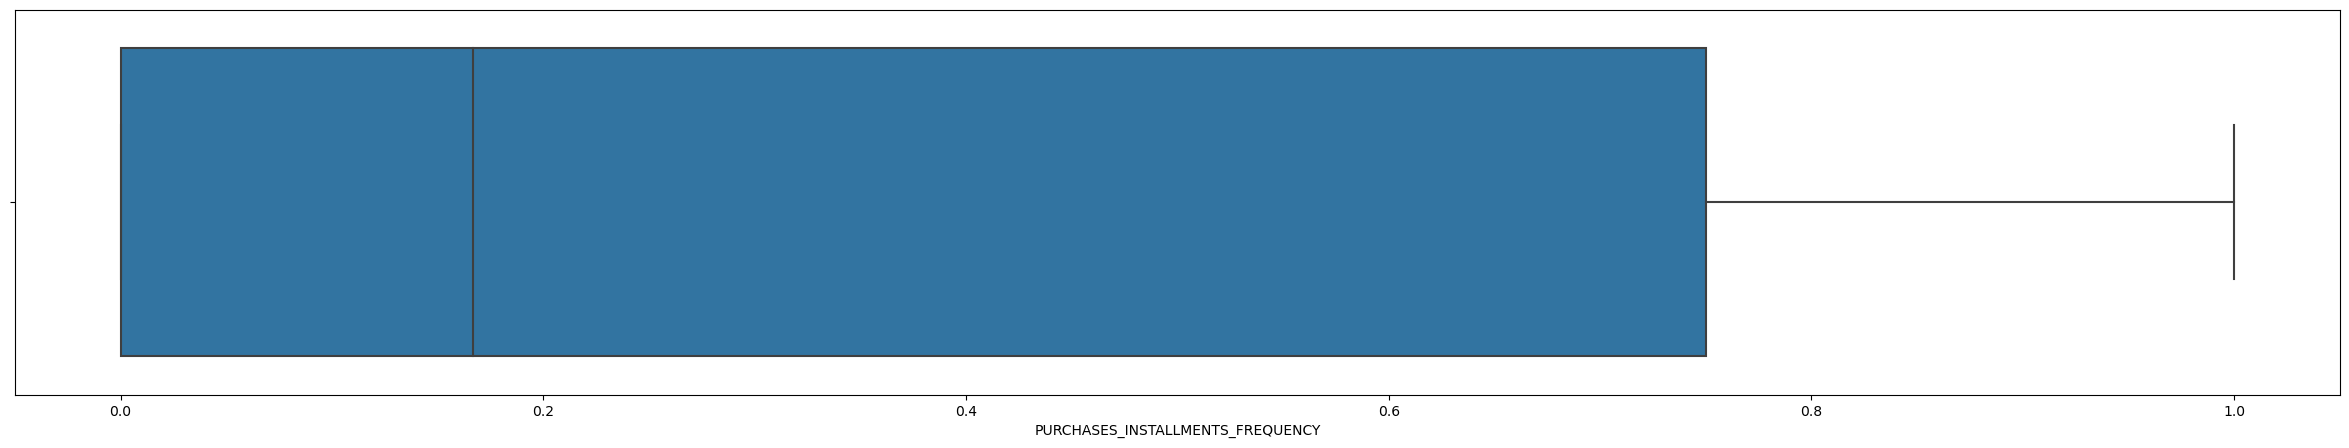

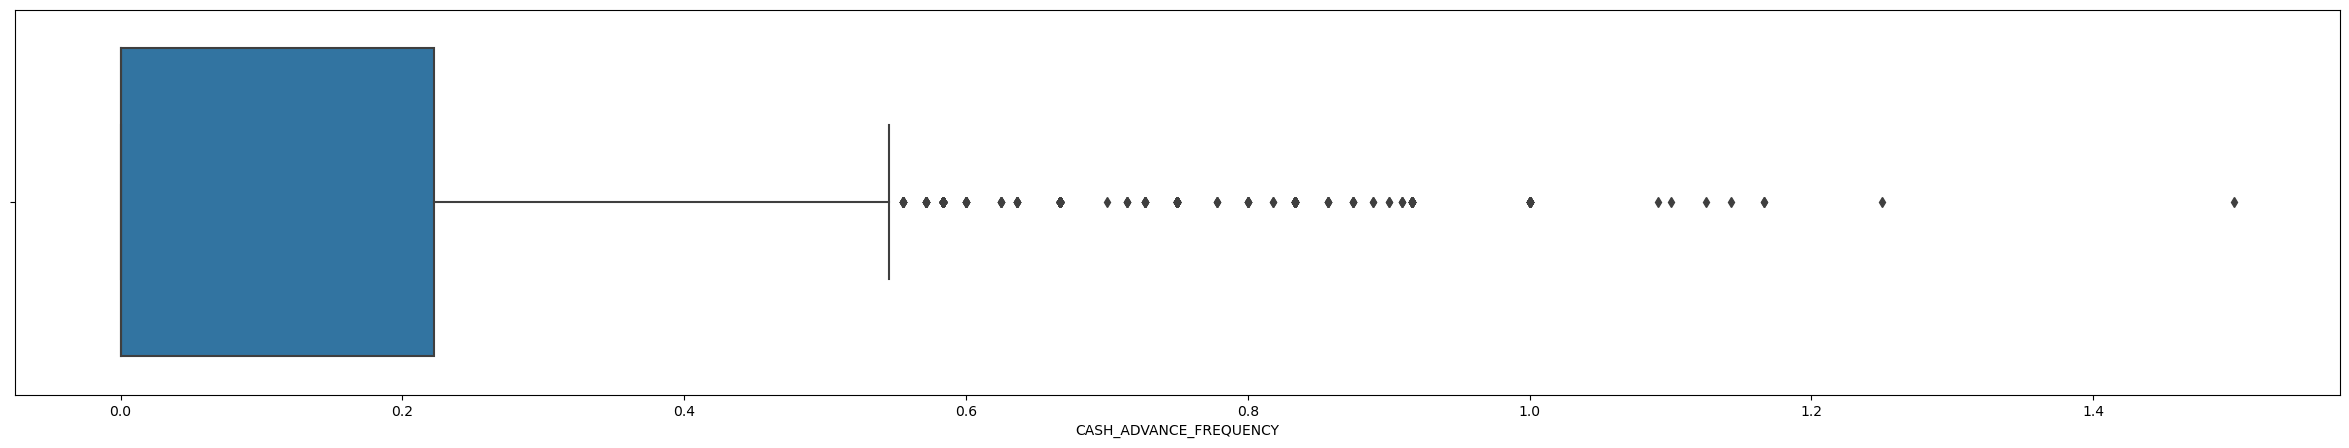

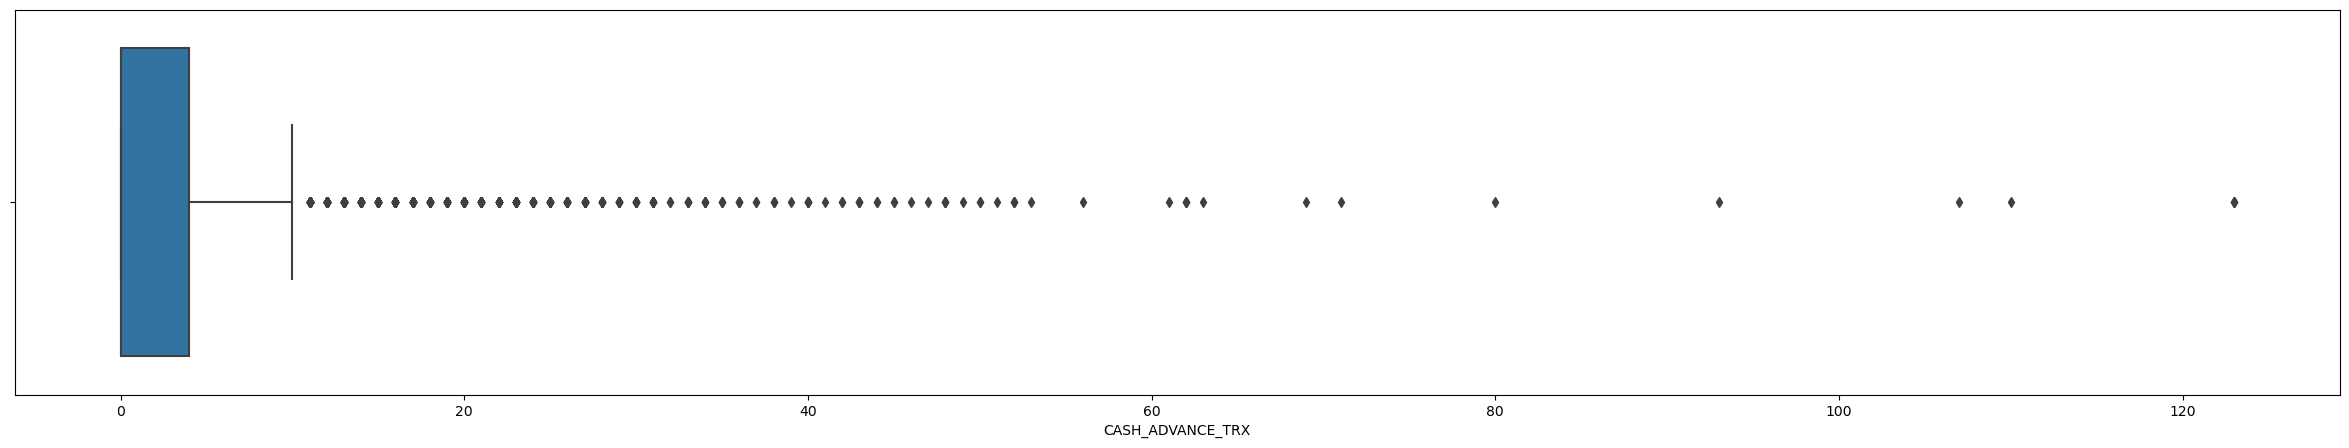

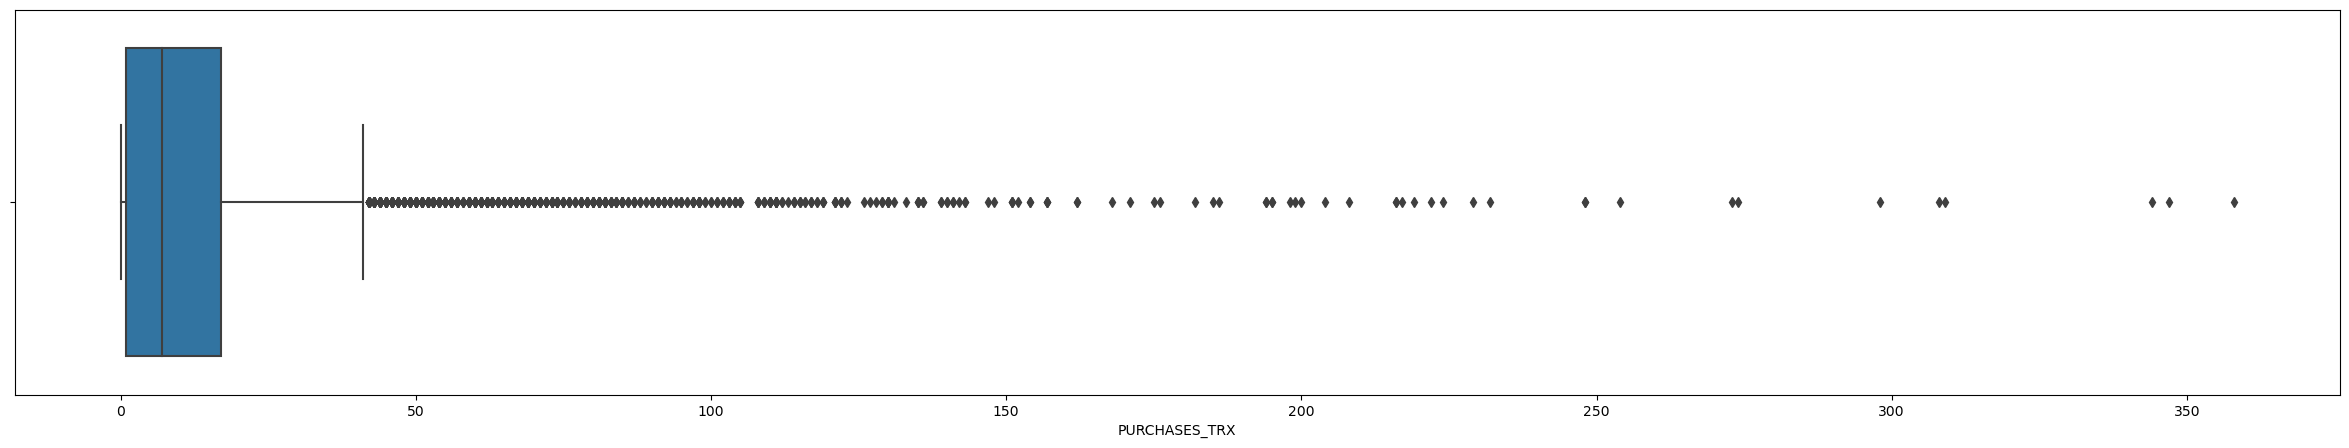

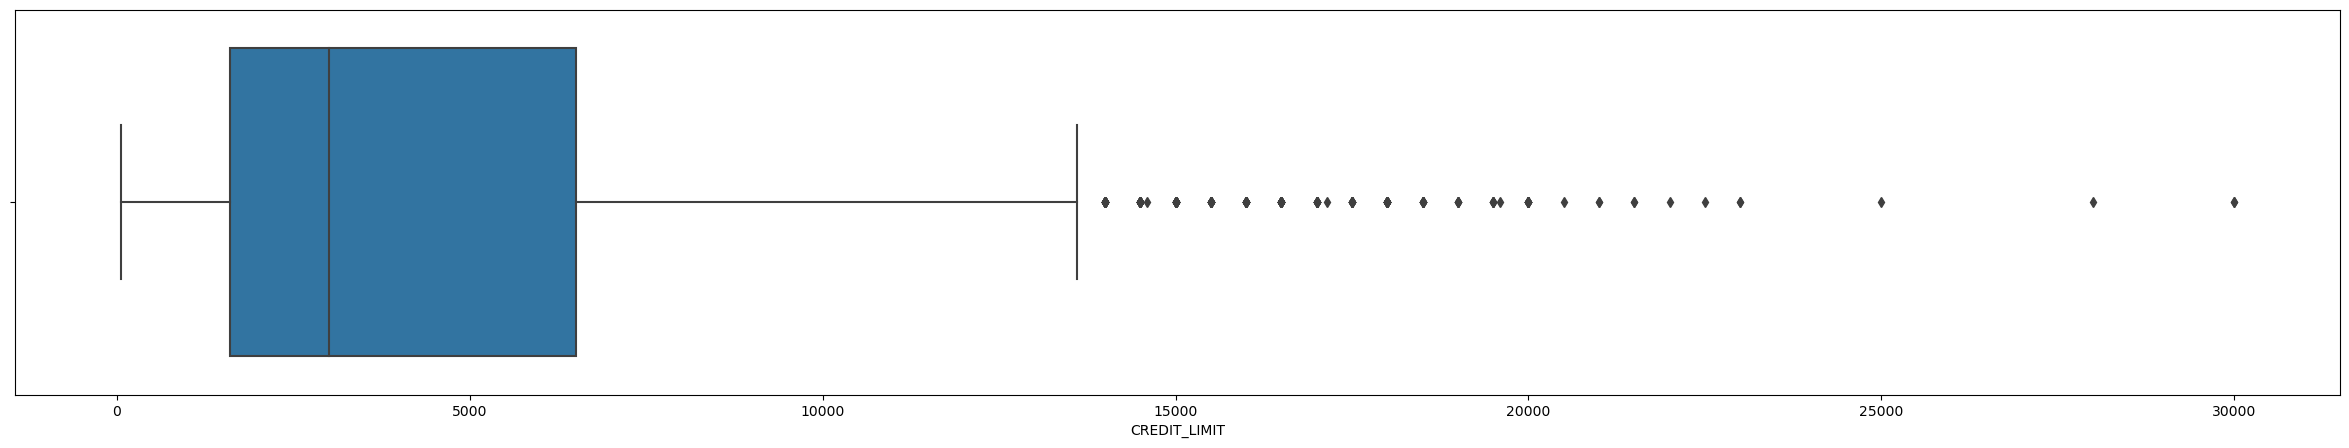

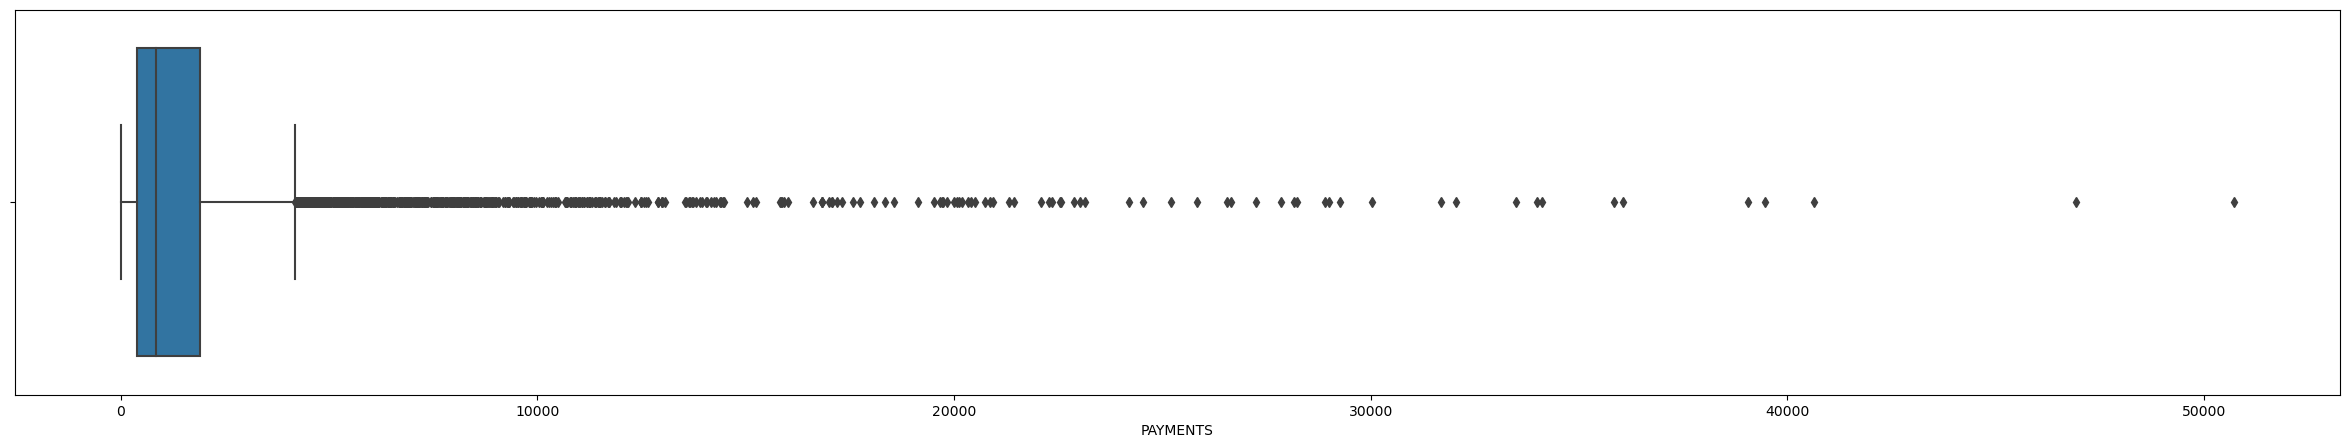

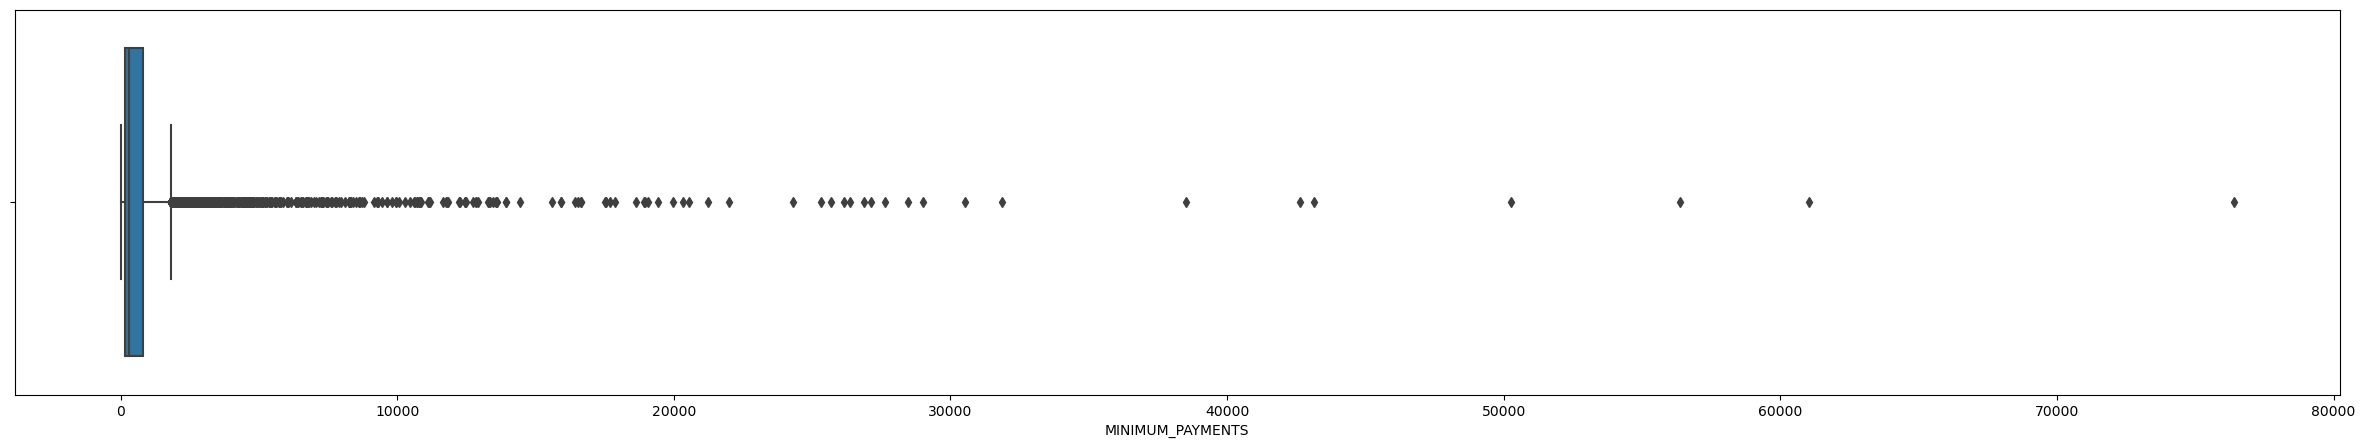

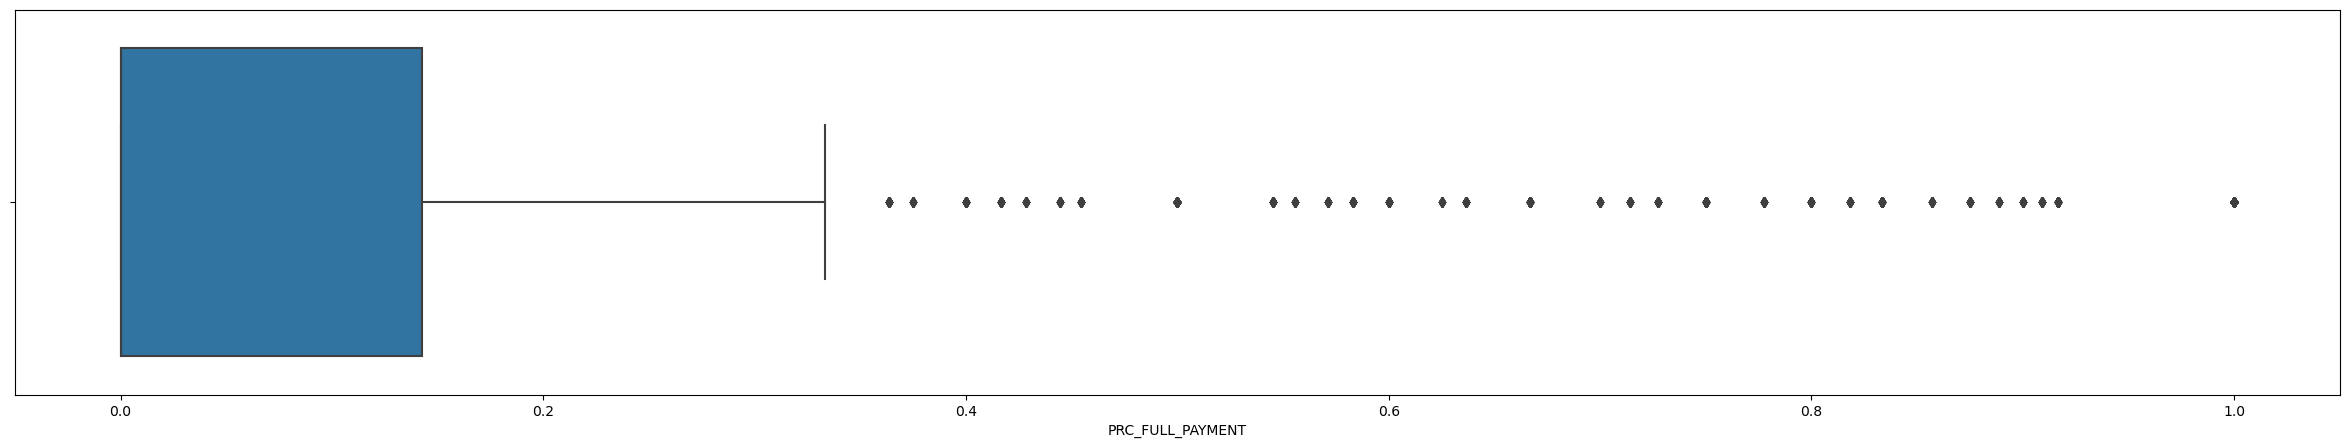

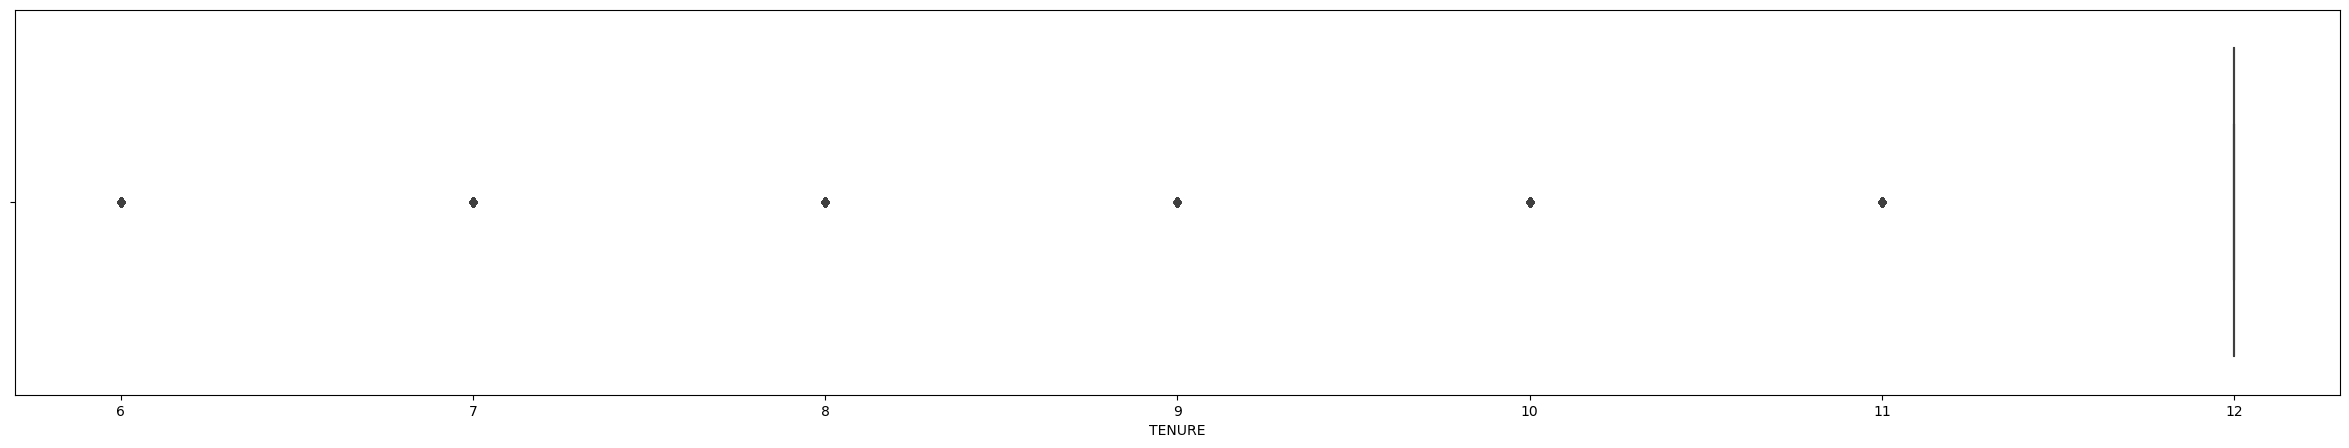

In [6]:
numeric = df.select_dtypes(include=['number']).columns
for column in numeric:
    plt.figure(figsize=(30, 5))
    sns.boxplot(data=df, x=column)
    plt.show()


<Axes: >

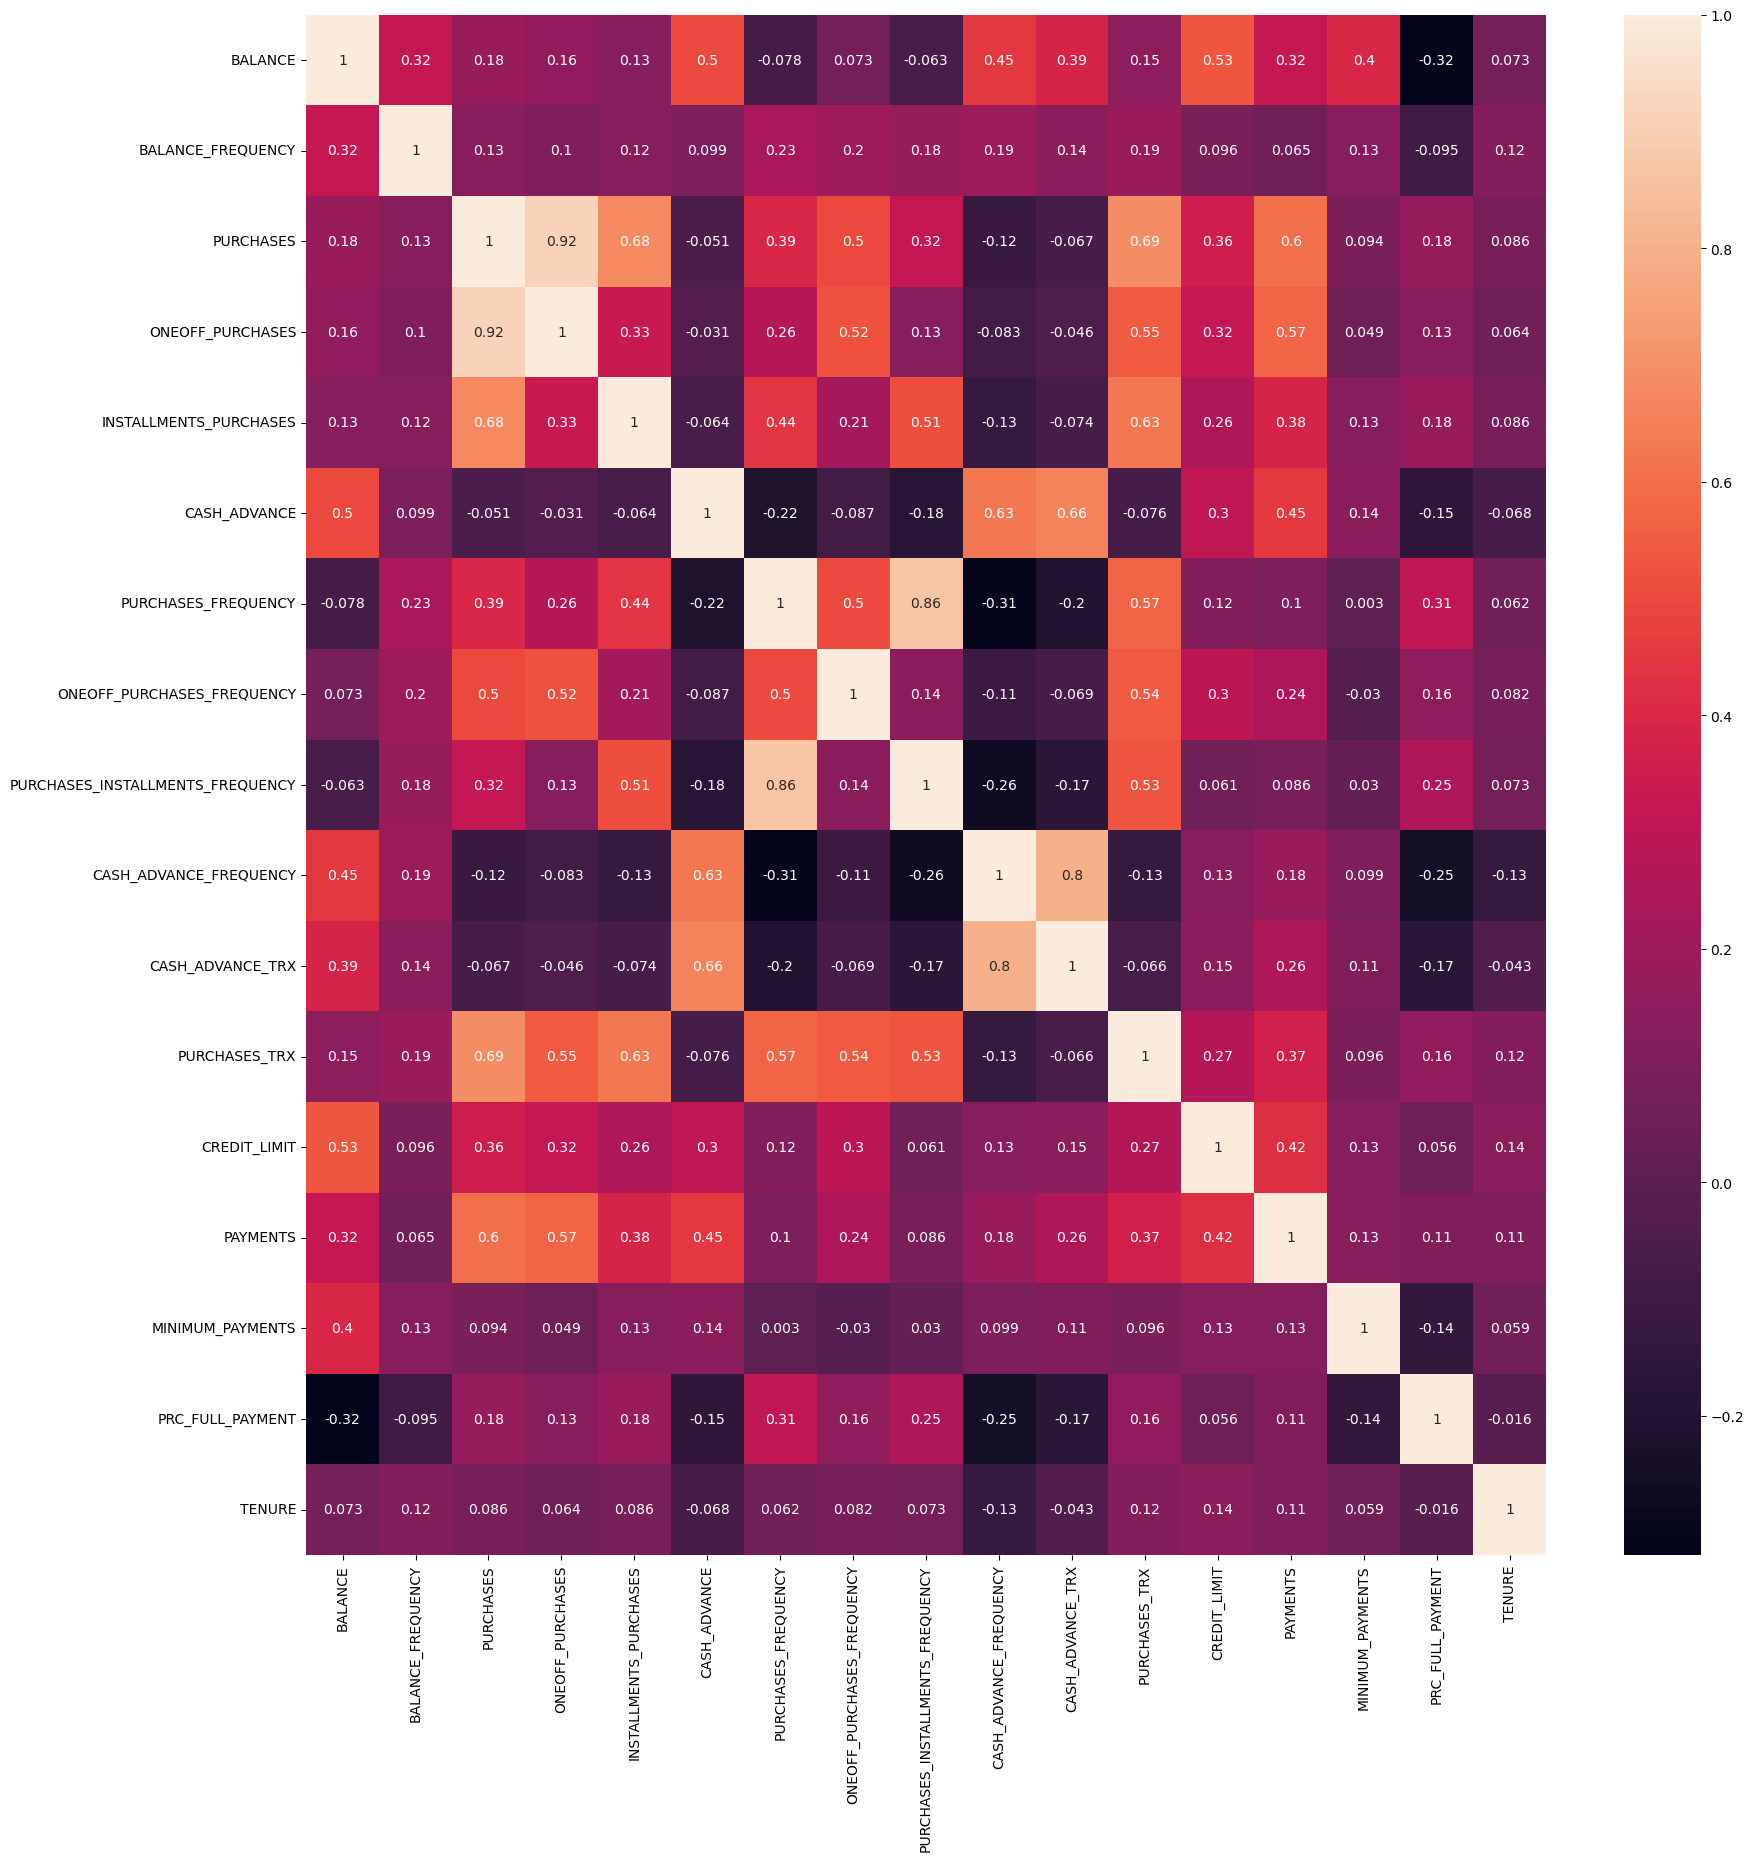

In [7]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True)


array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>],
       [<Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>],
       [<Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes: title={'center': 'TENURE'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

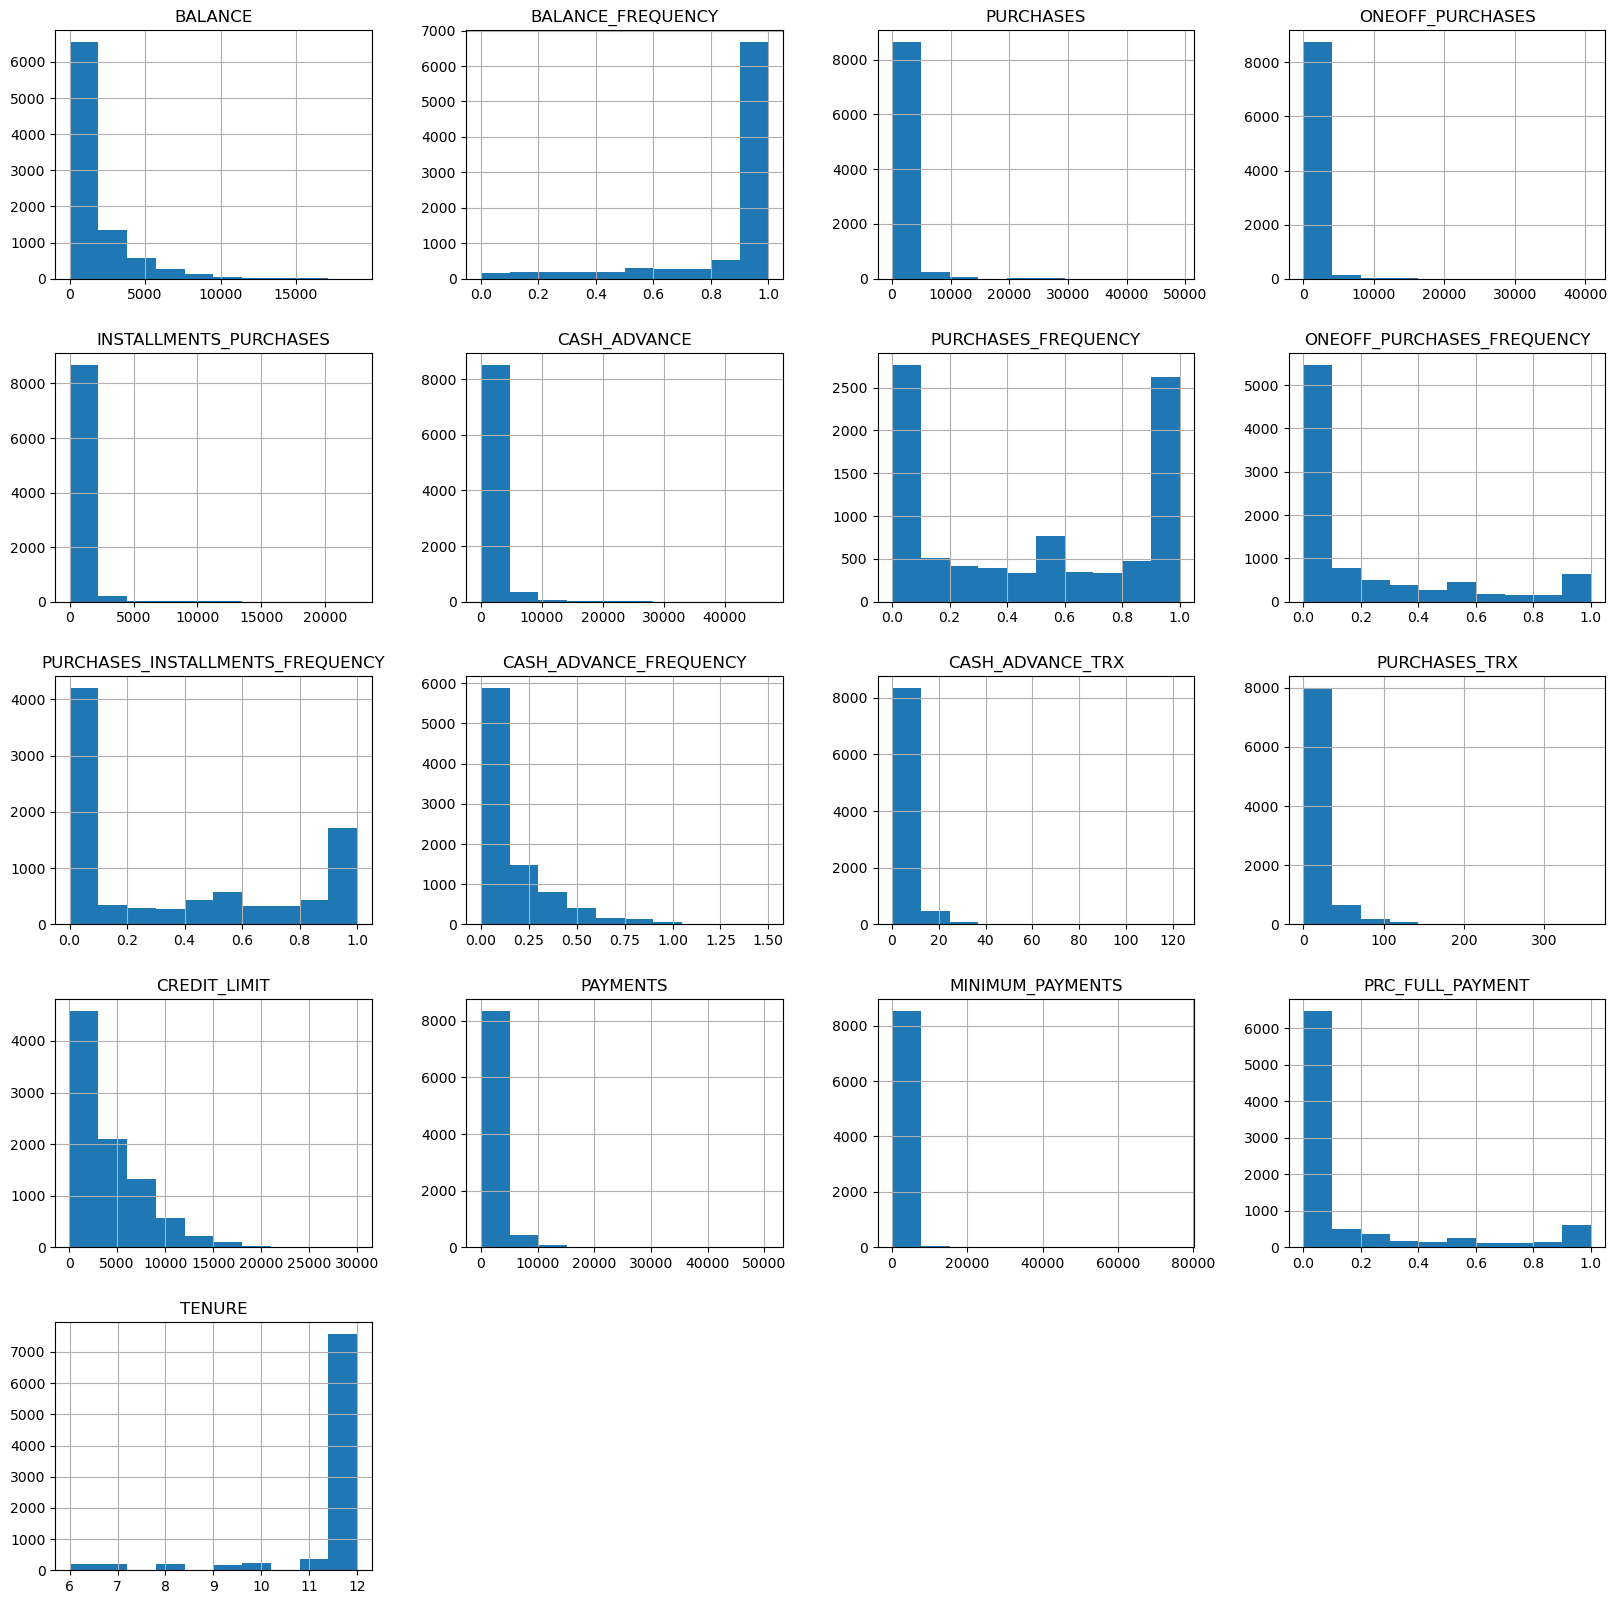

In [8]:
df.hist(figsize=(20,20))

In [ ]:
# feel free to investigate what you want

In [12]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-   nulls         <br>
2-  skeweenes         <br>
3-      outliers     <br>

In [8]:
#make a copy for the original dataset
df_copy=df.copy()


### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [ ]:
#Filling null values with the median 


In [9]:
#test 
df_copy.MINIMUM_PAYMENTS=df_copy.MINIMUM_PAYMENTS.fillna(df_copy.MINIMUM_PAYMENTS.mean())
df_copy.CREDIT_LIMIT = df_copy.CREDIT_LIMIT.fillna(df_copy.CREDIT_LIMIT.mean())
df_copy.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [10]:
from sklearn import preprocessing

In [11]:
scaled_data = np.log1p(df_copy)
scaled_data.shape
scaled_data=np.array(scaled_data)
scaled_data.shape


(8950, 17)

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
comp = pd.DataFrame(pca.fit_transform(scaled_data))

In [13]:
comp

0         1         2         3         4         5         6
0     1.011531 -5.617748  0.728312  0.359090  0.125281  0.166404 -0.592261
1    -8.966685  1.522150  0.977793 -1.251186 -1.290988 -0.287626  0.691799
2     2.619583  1.328186 -4.991413 -2.403817  0.883613  1.067755  0.318435
3    -0.358869  3.180280 -4.543581  2.790594  6.416665  0.948233  0.559178
4    -1.231940 -2.718404 -3.739555 -2.527990 -0.151122 -0.251932 -1.045657
...        ...       ...       ...       ...       ...       ...       ...
8945  2.441989 -5.511772  1.696387  1.103074 -0.637688  0.453871 -1.026428
8946  2.356232 -5.220046  1.924376  0.479273  0.510717  0.916004  0.317439
8947  1.662231 -5.980457  0.966387  1.363281  0.615443  0.191757 -0.695985
8948 -5.674710 -5.401594 -2.241981  2.590118  0.033365 -1.179001 -0.985196
8949  0.534223  2.793365 -4.152004  3.066021  1.694626  1.214775 -1.510833

[8950 rows x 7 columns]

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you 
5- Using different techniques for scaling and comment on the result

In [14]:
import numpy as np

def find_closest_centroids(X, centroids):
    return np.argmin(np.sum((X[:, np.newaxis, :] - centroids) ** 2, axis=2), axis=1)

def compute_centroids(X, idx, K):
    return np.array([X[idx == c].mean(axis=0) for c in range(K)])

def k_means_init_centroids(X, K):
    return X[np.random.choice(X.shape[0], K, replace=False), :]

class KMeans:
    def __init__(self, K, max_iters):
        self.K = K
        self.max_iters = max_iters

    def fit(self, X):
        self.centroids = k_means_init_centroids(X, self.K)
        for _ in range(self.max_iters):
            self.idx = find_closest_centroids(X, self.centroids)
            self.centroids = compute_centroids(X, self.idx, self.K)
        return self.centroids

    def predict(self, X):
        return find_closest_centroids(X, self.centroids)

# Example usage:
k_means = KMeans(4, 300)
centroids = k_means.fit(scaled_data)
idx = k_means.predict(scaled_data)

print(idx)
print('K-Means Done.')

[3 0 1 ... 3 0 2]
K-Means Done.


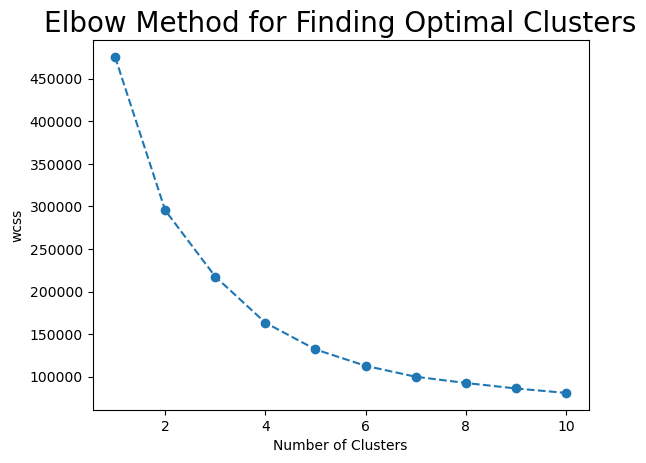

In [15]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
wcss= []
distortions=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(scaled_data, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
plt.plot(range(1,11),wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Finding Optimal Clusters', fontsize =20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')

plt.show()

In [16]:
from yellowbrick.cluster import KElbowVisualizer

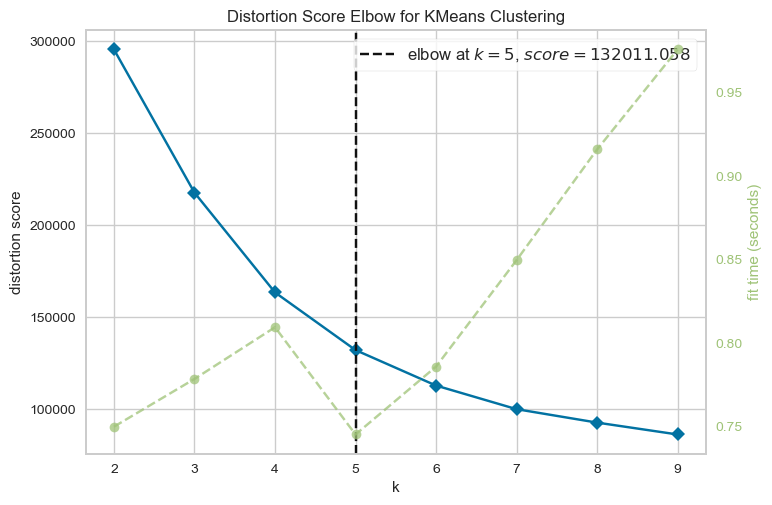

[3 1 0 ... 3 1 0]


In [17]:
visualizer_data = scaled_data  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10, max_iter=300)
label = kmeans.fit_predict(visualizer_data)
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(visualizer_data)
visualizer.show()
scaled_data = pd.DataFrame(visualizer_data)
print(label)

In [18]:
from sklearn.metrics import mean_squared_error
difference = mean_squared_error(label, idx)
print(difference)

1.5212290502793295


## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

0.4239175442697531

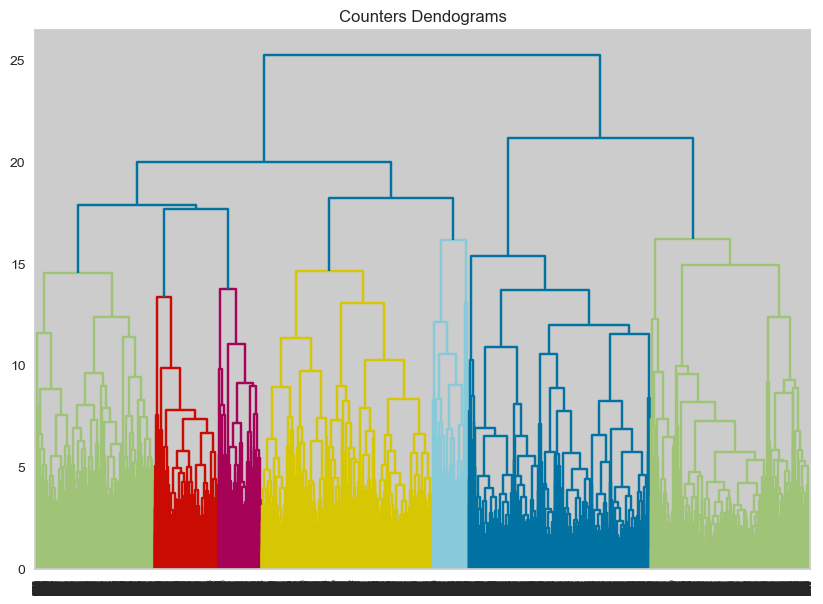

In [20]:
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

data_array = scaled_data.values

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
linkage_matrix=shc.linkage(y=data_array, method='complete', metric='euclidean')
dend = shc.dendrogram(linkage_matrix)
silhouette_avg = silhouette_score(data_array, label)
silhouette_avg
#fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [21]:
import plotly.express as px
from sklearn.manifold import TSNE
df_reduces = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=1000).fit_transform(data_array)
df_visualization = pd.DataFrame({
    'TSNE1': df_reduces[:, 0],
    'TSNE2': df_reduces[:, 1],
    'Label': label
})
h_fig = px.scatter(
    df_visualization,
    x='TSNE1',
    y='TSNE2',
    color='Label',
    title=f"Hierarchical Clustering Visualization )"
)

h_fig.show()


In [22]:
data_array = scaled_data.values

In [23]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
labels = model.fit_predict(data_array)
silhouette_avg = silhouette_score(data_array, labels)
print(f'For n_clusters = 5, the silhouette score is {silhouette_avg}')


For n_clusters = 5, the silhouette score is 0.3444649226518247


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [24]:
import plotly.express as px
from sklearn.manifold import TSNE
df_reduces = TSNE(init='pca', n_components=2, perplexity=100, learning_rate=1000).fit_transform(scaled_data)
DBSCAN_fig = px.scatter(
    x = df_reduces[:, 0],
    y = df_reduces[:, 1],
    color = label,
    title = "DBSCAN Cluster Visualization "
)
DBSCAN_fig.show()
